In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

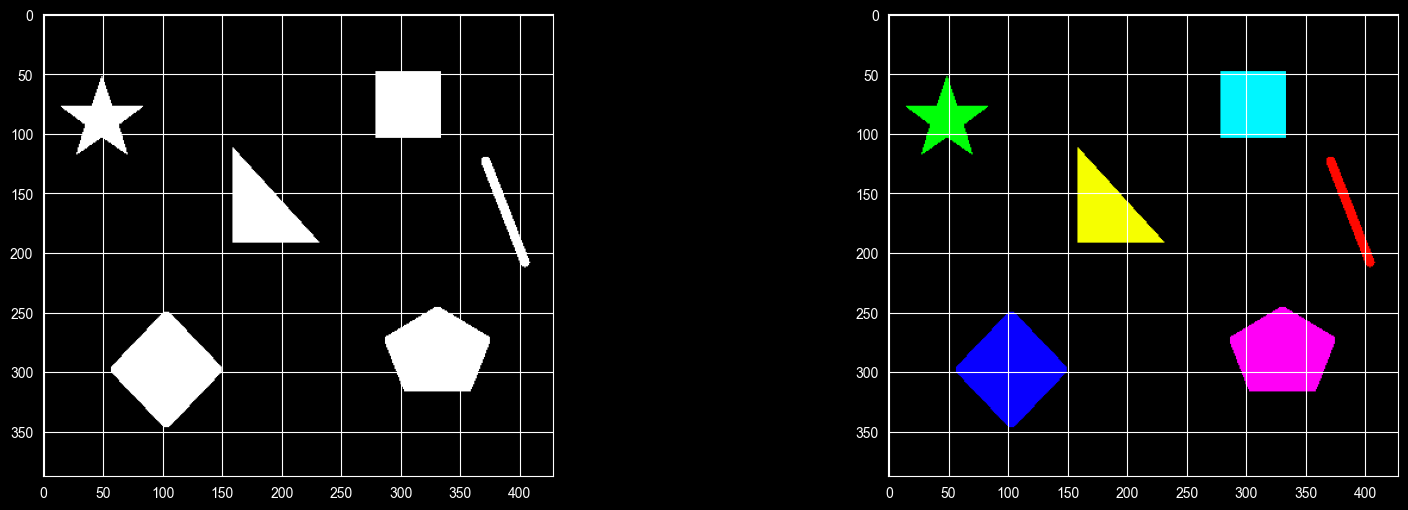

In [72]:
img = cv.imread("../../../class.vision/images/shapes.png", 0)
_, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

num_labels, labels = cv.connectedComponents(binary_img)

label_hue = np.uint8(labels/np.max(labels) * 179)
blank = np.ones_like(label_hue) * 255
labeled_img = cv.merge([label_hue, blank, blank])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

labeled_img[label_hue == 0] = 0

plt.figure(figsize=(20, 6))
plt.subplot(121); plt.imshow(img, cmap="gray")
plt.subplot(122); plt.imshow(labeled_img, vmin=0, vmax=255)

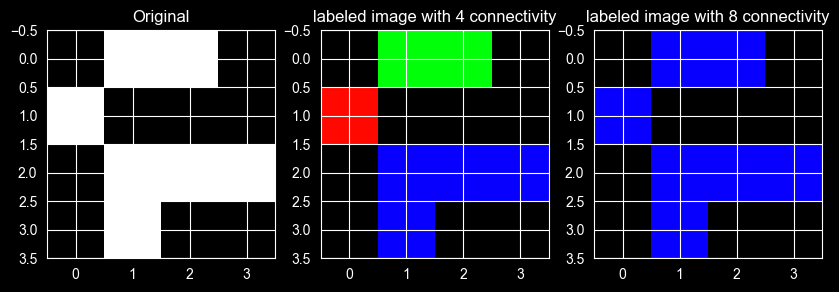

In [73]:
img = cv.imread("../../../class.vision/images/small-connected-test.png", 0)
_, img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
_, labels_with_4_connectivity = cv.connectedComponents(img, connectivity=4)
_, labels_with_8_connectivity = cv.connectedComponents(img, connectivity=8)

label_hue4 = np.uint8(179*labels_with_4_connectivity/np.max(labels_with_4_connectivity))
label_hue8 = np.uint8(179*labels_with_8_connectivity/np.max(labels_with_8_connectivity))

blank = np.ones_like(img) * 255
labeled_img4 = cv.merge([label_hue4, blank, blank])
labeled_img8 = cv.merge([label_hue8, blank, blank])

# Converting cvt to BGR
labeled_img4 = cv.cvtColor(labeled_img4, cv.COLOR_HSV2BGR)
labeled_img8 = cv.cvtColor(labeled_img8, cv.COLOR_HSV2BGR)

# set bg label to black
labeled_img4[label_hue4==0] = 0
labeled_img8[label_hue8==0] = 0

plt.figure(figsize=[10,8])
plt.subplot(131);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(132);plt.imshow(labeled_img4, cmap='gray');plt.title("labeled image with 4 connectivity");
plt.subplot(133);plt.imshow(labeled_img8, cmap='gray');plt.title("labeled image with 8 connectivity");